In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

To Load the dataset in google colab

In [2]:
from google.colab import files
uploaded=files.upload()

Saving test_loan.csv to test_loan.csv


In [3]:
df=pd.read_csv('/content/test_loan.csv')

In [4]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


To find the null values in the dataset


In [6]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [7]:
df['Dependents']=df['Dependents'].str.strip('+')

In [8]:
df['Dependents']=df['Dependents'].astype('float64')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    float64
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(4), int64(2), object(6)
memory usage: 34.5+ KB


To change null values(numeric) to the median of each feature (if it is skewed)


In [10]:
num_col=['Dependents','LoanAmount','Loan_Amount_Term','Credit_History']

In [11]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
df[num_col]=imputer.fit_transform(df[num_col])

In [12]:
df.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
dtype: int64

To change null values(categorical) to the mode of each feature


In [13]:
cat_col=['Gender','Self_Employed']

In [14]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df[cat_col]=imputer.fit_transform(df[cat_col])

In [15]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [16]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2.0,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2.0,Graduate,No,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,Male,No,0.0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3.0,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0.0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0.0,Graduate,No,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,Male,Yes,0.0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


Outlier Detection of each feature


<Axes: ylabel='ApplicantIncome'>

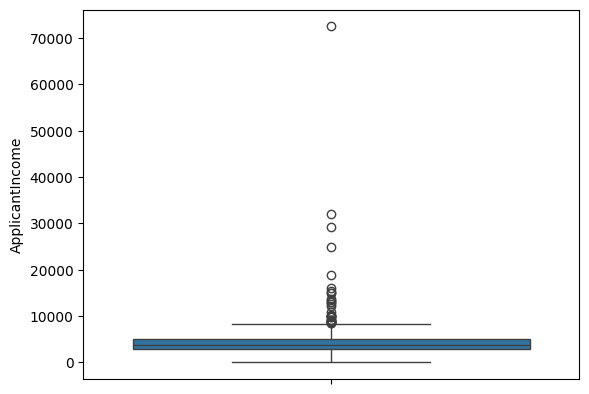

In [17]:
sns.boxplot(df['ApplicantIncome'])

<Axes: ylabel='CoapplicantIncome'>

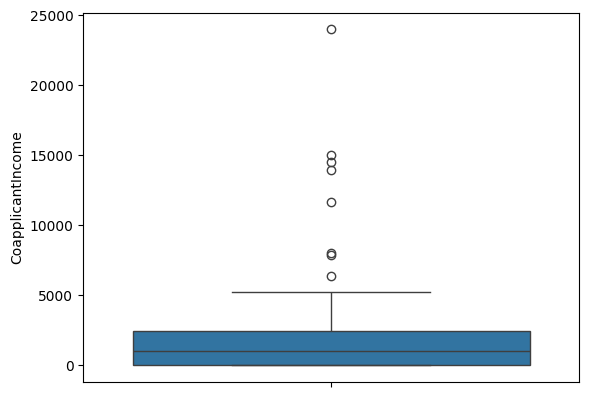

In [18]:
sns.boxplot(df['CoapplicantIncome'])

<Axes: ylabel='LoanAmount'>

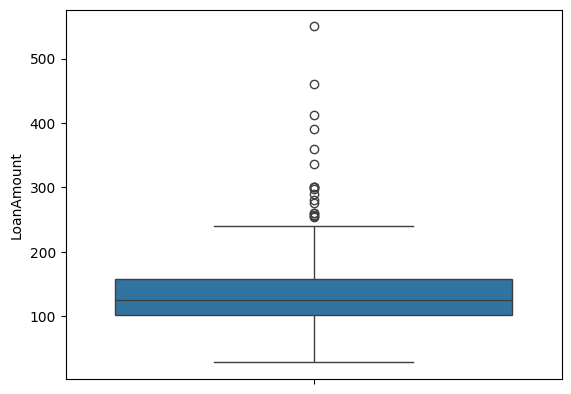

In [19]:
sns.boxplot(df['LoanAmount'])

<Axes: ylabel='Loan_Amount_Term'>

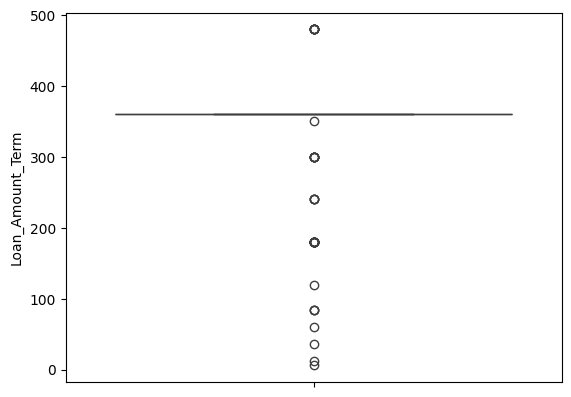

In [20]:
sns.boxplot(df['Loan_Amount_Term'])

In [21]:
#Outlier handling: capping


In [22]:
q1=df['ApplicantIncome'].quantile(0.25)
q2=df['ApplicantIncome'].quantile(0.5)
q3=df['ApplicantIncome'].quantile(0.75)
iqr=q3-q1
print(iqr)

2196.0


In [23]:
upper_lim=q3+(1.5*iqr)
lower_lim=q1-(1.5*iqr)
print(upper_lim)
print(lower_lim)

8354.0
-430.0


In [24]:
# to cap the outliers
def limit_imputer(value):
  if value>upper_lim:
    return upper_lim
  if value<lower_lim:
    return lower_lim
  else:
    return value


In [25]:
 df['ApplicantIncome']=df['ApplicantIncome'].apply(limit_imputer)

In [26]:
df['ApplicantIncome'].describe()

count     367.000000
mean     4238.964578
std      1950.976357
min         0.000000
25%      2864.000000
50%      3786.000000
75%      5060.000000
max      8354.000000
Name: ApplicantIncome, dtype: float64

In [27]:
Q1=df['CoapplicantIncome'].quantile(0.25)
Q2=df['CoapplicantIncome'].quantile(0.5)
Q3=df['CoapplicantIncome'].quantile(0.75)
IQR=Q3-Q1
print(IQR)

2430.5


In [28]:
up_lim=q3+(1.5*IQR)
lo_lim=q1-(1.5*IQR)
print(up_lim)
print(lo_lim)

8705.75
-781.75


In [29]:
# to cap the outliers
def limit_imputer(value):
  if value>up_lim:
    return up_lim
  if value<lo_lim:
    return lo_lim
  else:
    return value

In [30]:
 df['CoapplicantIncome']=df['CoapplicantIncome'].apply(limit_imputer)

In [31]:
df['CoapplicantIncome'].describe()

count     367.000000
mean     1472.500681
std      1763.674490
min         0.000000
25%         0.000000
50%      1025.000000
75%      2430.500000
max      8705.750000
Name: CoapplicantIncome, dtype: float64

In [32]:
q_1=df['LoanAmount'].quantile(0.25)
q_2=df['LoanAmount'].quantile(0.5)
q_3=df['LoanAmount'].quantile(0.75)
i_qr=q_3-q_1
print(i_qr)

56.5


In [33]:
upp_lim=q3+(1.5*i_qr)
low_lim=q1-(1.5*i_qr)
print(upp_lim)
print(low_lim)

5144.75
2779.25


In [34]:
# to cap the outliers
def limit_imputer(value):
  if value>upp_lim:
    return upp_lim
  if value<low_lim:
    return low_lim
  else:
    return value

In [35]:
df['LoanAmount']=df['LoanAmount'].apply(limit_imputer)

In [36]:
df['LoanAmount'].describe()

count     367.00
mean     2779.25
std         0.00
min      2779.25
25%      2779.25
50%      2779.25
75%      2779.25
max      2779.25
Name: LoanAmount, dtype: float64

In [37]:
df['Loan_Amount_Term'].describe()

count    367.000000
mean     342.822888
std       64.658402
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [38]:
Q_1=df['Loan_Amount_Term'].quantile(0.25)
Q_2=df['Loan_Amount_Term'].quantile(0.5)
Q_3=df['Loan_Amount_Term'].quantile(0.75)
I_qr=Q_3-Q_1
print(I_qr)

0.0


In [39]:
Upp_lim=Q3+(1.5*I_qr)
Low_lim=Q1-(1.5*I_qr)
print(Upp_lim)
print(Low_lim)

2430.5
0.0


In [40]:
# to cap the outliers
def limit_imputer(value):
  if value>Upp_lim:
    return Upp_lim
  if value<Low_lim:
    return Low_lim
  else:
    return value

In [41]:
 df['Loan_Amount_Term']=df['Loan_Amount_Term'].apply(limit_imputer)

In [42]:
df['Loan_Amount_Term'].describe()

count    367.000000
mean     342.822888
std       64.658402
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

In [43]:
df.head(2)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0.0,Graduate,No,5720.0,0.0,2779.25,360.0,1.0,Urban
1,LP001022,Male,Yes,1.0,Graduate,No,3076.0,1500.0,2779.25,360.0,1.0,Urban


Label Encoding

In [44]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [45]:
df['Married']=le.fit_transform(df['Married'])

In [46]:
df['Self_Employed']=le.fit_transform(df['Self_Employed'])

In [47]:
df['Loan_ID']=le.fit_transform(df['Loan_ID'])

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,Male,1,0.0,Graduate,0,5720.0,0.0,2779.25,360.0,1.0,Urban
1,1,Male,1,1.0,Graduate,0,3076.0,1500.0,2779.25,360.0,1.0,Urban
2,2,Male,1,2.0,Graduate,0,5000.0,1800.0,2779.25,360.0,1.0,Urban
3,3,Male,1,2.0,Graduate,0,2340.0,2546.0,2779.25,360.0,1.0,Urban
4,4,Male,0,0.0,Not Graduate,0,3276.0,0.0,2779.25,360.0,1.0,Urban


One hot encoding

In [49]:
df=pd.get_dummies(df)

In [50]:
df

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0.0,0,5720.0,0.0,2779.25,360.0,1.0,0,1,1,0,0,0,1
1,1,1,1.0,0,3076.0,1500.0,2779.25,360.0,1.0,0,1,1,0,0,0,1
2,2,1,2.0,0,5000.0,1800.0,2779.25,360.0,1.0,0,1,1,0,0,0,1
3,3,1,2.0,0,2340.0,2546.0,2779.25,360.0,1.0,0,1,1,0,0,0,1
4,4,0,0.0,0,3276.0,0.0,2779.25,360.0,1.0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,3.0,1,4009.0,1777.0,2779.25,360.0,1.0,0,1,0,1,0,0,1
363,363,1,0.0,0,4158.0,709.0,2779.25,360.0,1.0,0,1,1,0,0,0,1
364,364,0,0.0,0,3250.0,1993.0,2779.25,360.0,1.0,0,1,1,0,0,1,0
365,365,1,0.0,0,5000.0,2393.0,2779.25,360.0,1.0,0,1,1,0,1,0,0


Minmax Scaling


In [51]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

In [52]:
df.loc[:,['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']] = min_max.fit_transform(df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']])

In [53]:
df

,Loan_ID,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,1,0.0,0,0.684702,0.000000,0.0,0.746835,1.0,0,1,1,0,0,0,1
1,1,1,1.0,0,0.368207,0.172300,0.0,0.746835,1.0,0,1,1,0,0,0,1
2,2,1,2.0,0,0.598516,0.206760,0.0,0.746835,1.0,0,1,1,0,0,0,1
3,3,1,2.0,0,0.280105,0.292450,0.0,0.746835,1.0,0,1,1,0,0,0,1
4,4,0,0.0,0,0.392147,0.000000,0.0,0.746835,1.0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,362,1,3.0,1,0.479890,0.204118,0.0,0.746835,1.0,0,1,0,1,0,0,1
363,363,1,0.0,0,0.497726,0.081440,0.0,0.746835,1.0,0,1,1,0,0,0,1
364,364,0,0.0,0,0.389035,0.228929,0.0,0.746835,1.0,0,1,1,0,0,1,0
365,365,1,0.0,0,0.598516,0.274876,0.0,0.746835,1.0,0,1,1,0,1,0,0
